In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
import binance
import ta

client = binance.Client()
data = client.get_historical_klines('BTCBUSD', client.KLINE_INTERVAL_1DAY, '14-Dec-2017', '2-Feb-2023')
for i in range(0, len(data)):
    for j in range(0,11):
        data[i][j] = float(data[i][j])
for line in data:
    del line[2:4]
    del line[2:]

pd.options.display.max_rows = 999999
data = pd.DataFrame(data,columns = ['Date','Close'])
data['Date'] = pd.to_datetime(data['Date'], unit = 'ms',utc = True).map(lambda x:x.tz_convert('Europe/Rome'))
data.set_index('Date', inplace = True)

In [2]:
data["SMA20"] = data.Close.rolling(20).mean()
data["BBU10"] = data.SMA20 + 2 * data.Close.rolling(20).std()
data["BBL10"] = data.SMA20 - 2 * data.Close.rolling(20).std()

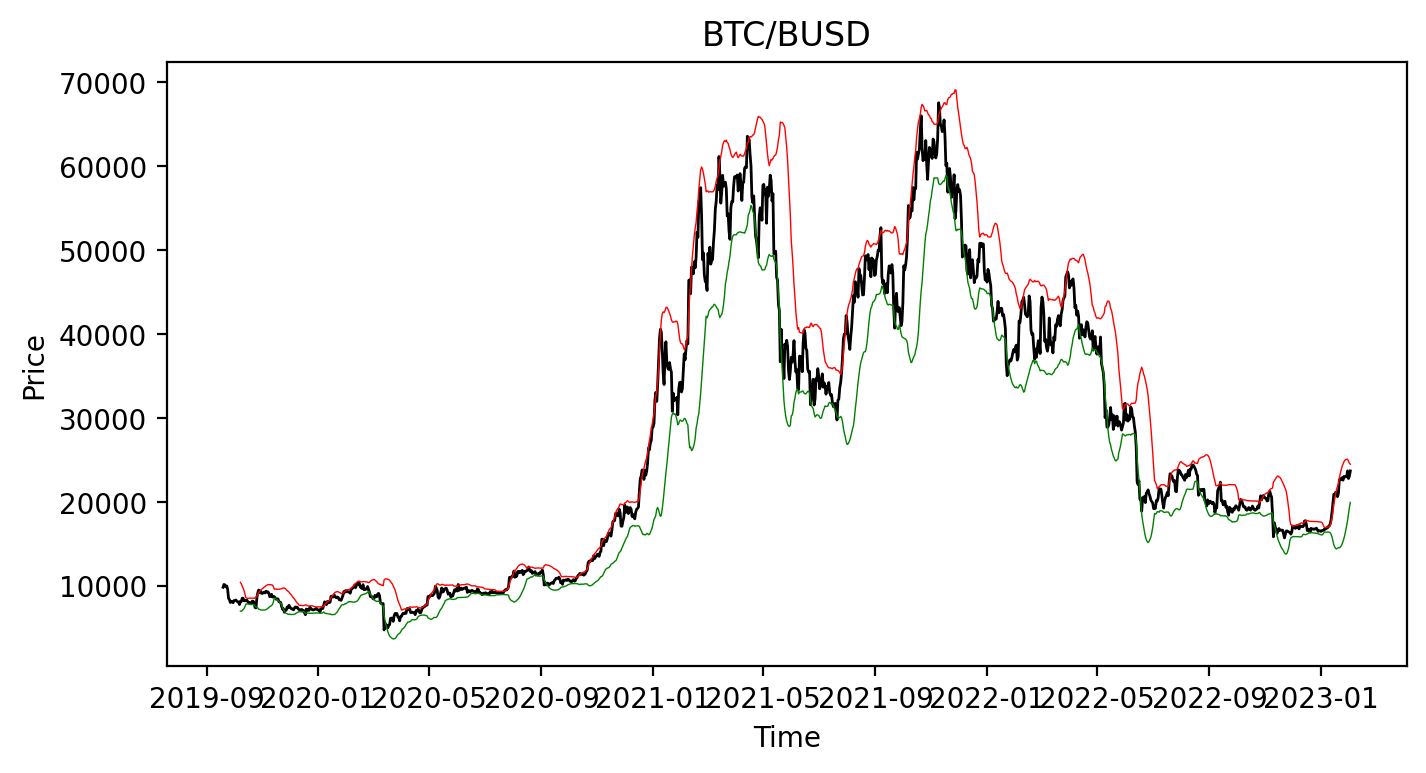

In [3]:
plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Close, color = 'black', linewidth = 1.0)
plt.plot(data.BBU10, color = 'red', linewidth = 0.5)
plt.plot(data.BBL10, color = 'green', linewidth = 0.5)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BTC/BUSD")
plt.show();

In [4]:
data.head(200)

,Close,SMA20,BBU10,BBL10
Date,,,,
2019-09-19 02:00:00+02:00,9881.43,NaN,NaN,NaN
2019-09-20 02:00:00+02:00,10214.31,NaN,NaN,NaN
2019-09-21 02:00:00+02:00,10169.44,NaN,NaN,NaN
2019-09-22 02:00:00+02:00,9928.07,NaN,NaN,NaN
2019-09-23 02:00:00+02:00,10037.70,NaN,NaN,NaN
2019-09-24 02:00:00+02:00,9675.42,NaN,NaN,NaN
2019-09-25 02:00:00+02:00,8558.92,NaN,NaN,NaN
2019-09-26 02:00:00+02:00,8415.14,NaN,NaN,NaN
2019-09-27 02:00:00+02:00,8067.78,NaN,NaN,NaN


In [5]:
data["DeltaPerc"]= data.Close.pct_change() # variazione percentuale tra la close n e la close n-1

data["Position"] = np.where((data.Close < data.BBL10), 1, 0) # 1 quando la posizione è aperta / 0 quando è chiusa

data.Position = data.Position.shift(1) # shifto tutto di 1 altrimenti mi prevede il futuro

data["StrategyPerc"] = (data.DeltaPerc * data.Position) # Deltaperc quando Position = 1 / 0 altrimenti

data["Strategy_Equity"] = (data.StrategyPerc + 1).cumprod() * 100

data.dropna(inplace = True)

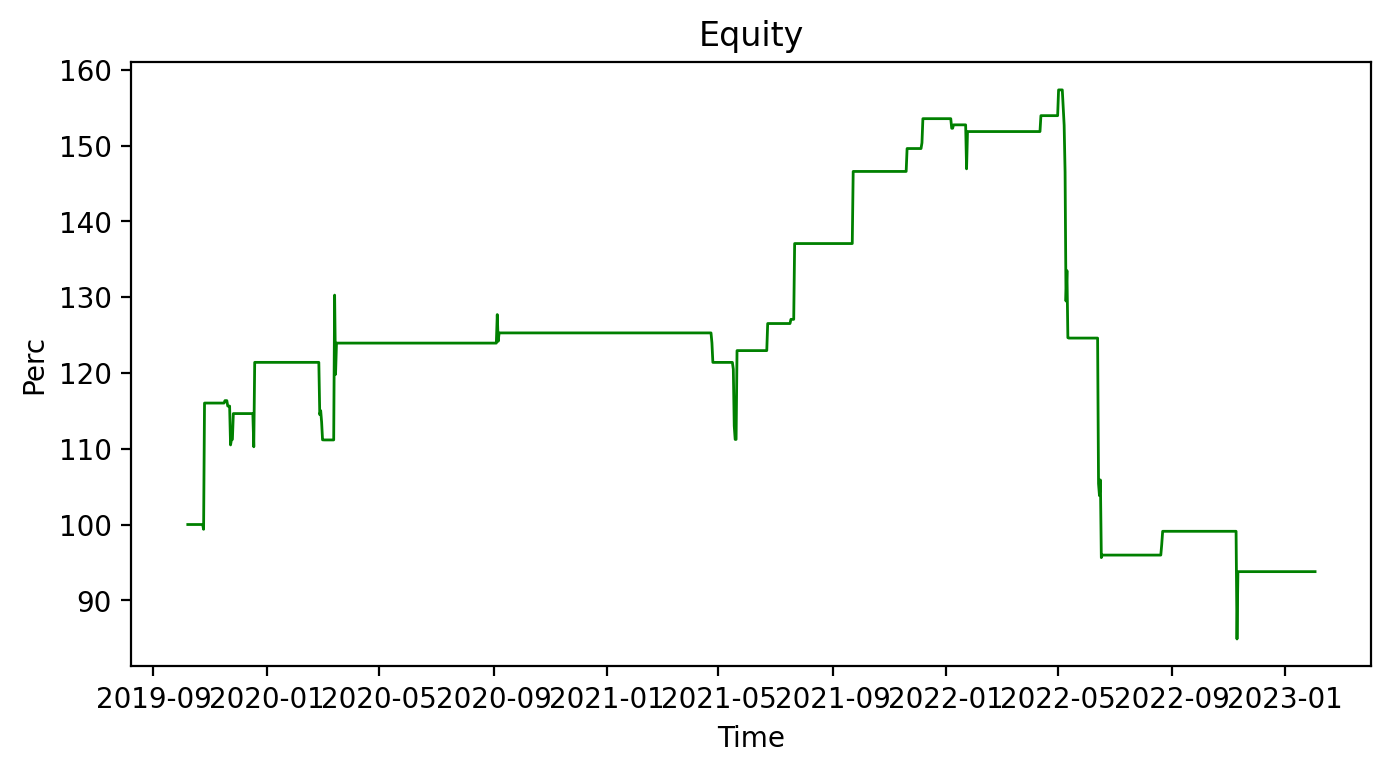

In [6]:
plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Strategy_Equity, color = 'green', linewidth = 1.0)
plt.xlabel("Time")
plt.ylabel("Perc")
plt.title("Equity")
plt.show();

In [7]:
data["Short"] = np.where((data.Close > data.BBU10), 1, 0) # 1 quando la posizione è aperta / 0 quando è chiusa
data.Short = data.Short.shift(1)
data.dropna(inplace = True)
data["ShortPerc"] = - (data.DeltaPerc * data.Short)
data["LongShortPercentage"] = data.ShortPerc + data.StrategyPerc
data["Final_Equity"] = (data.LongShortPercentage + 1).cumprod() * 100
data.tail(10)

,Close,SMA20,BBU10,BBL10,DeltaPerc,Position,StrategyPerc,Strategy_Equity,Short,ShortPerc,LongShortPercentage,Final_Equity
Date,,,,,,,,,,,,
2023-01-24 01:00:00+01:00,22920.10,19651.2580,24272.362731,15030.153269,0.009094,0.0,0.0,93.781683,0.0,-0.0,0.0,82.435624
2023-01-25 01:00:00+01:00,22636.09,19940.7915,24547.292505,15334.290495,-0.012391,0.0,-0.0,93.781683,0.0,0.0,0.0,82.435624
2023-01-26 01:00:00+01:00,23065.73,20252.8715,24815.836323,15689.906677,0.018980,0.0,0.0,93.781683,0.0,-0.0,0.0,82.435624
2023-01-27 01:00:00+01:00,23010.12,20556.1175,24998.038462,16114.196538,-0.002411,0.0,-0.0,93.781683,0.0,0.0,0.0,82.435624
2023-01-28 01:00:00+01:00,23076.46,20862.8840,25096.148801,16629.619199,0.002883,0.0,0.0,93.781683,0.0,-0.0,0.0,82.435624
2023-01-29 01:00:00+01:00,23025.78,21157.9255,25107.275892,17208.575108,-0.002196,0.0,-0.0,93.781683,0.0,0.0,0.0,82.435624
2023-01-30 01:00:00+01:00,23744.59,21486.2370,25121.897319,17850.576681,0.031218,0.0,0.0,93.781683,0.0,-0.0,0.0,82.435624
2023-01-31 01:00:00+01:00,22828.58,21755.5925,24893.688478,18617.496522,-0.038578,0.0,-0.0,93.781683,0.0,0.0,0.0,82.435624
2023-02-01 01:00:00+01:00,23127.55,22014.9040,24641.290905,19388.517095,0.013096,0.0,0.0,93.781683,0.0,-0.0,0.0,82.435624


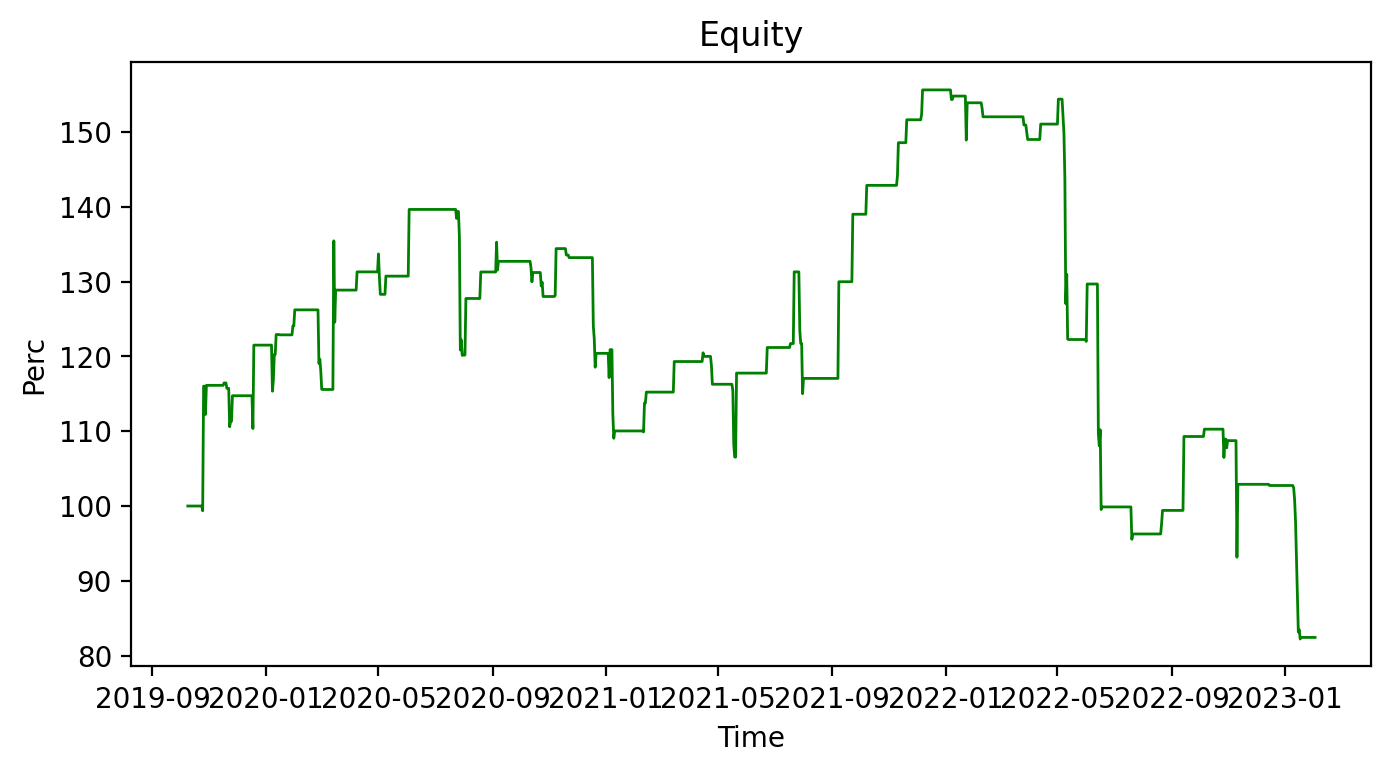

In [8]:
plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Final_Equity, color = 'green', linewidth = 1.0)
plt.xlabel("Time")
plt.ylabel("Perc")
plt.title("Equity")
plt.show();